In [1]:
import pandas as pd
import seaborn as sns
from utils.parser import extract_answer, accuracy, exceed_reasoning, num_no_compress, average_generation_length
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
kv_budget = [128, 500, 1500, 2000]
methods = ["snapkv", "rkv"]

In [3]:
fullkv = pd.read_json("results/output_fullkv.jsonl", lines=True)
snapkv = pd.read_json("results/output_snapkv_128.jsonl", lines=True)
rkv = pd.read_json("results/output_rkv_128.jsonl", lines=True)

In [4]:
fullkv

,id,problem,solution,answer,url,question,prompt,index,output,prefill_tokens,output_tokens,total_tokens,sample_idx
0,60,Every morning Aya goes for a $9$-kilometer-lon...,$\frac{9}{s} + t = 4$ in hours and $\frac{9}{s...,204,https://artofproblemsolving.com/wiki/index.php...,Every morning Aya goes for a $9$-kilometer-lon...,You are given a math problem.\n\nProblem: Ever...,0,".\n\nOkay, let's tackle this problem step by s...",186,2649,2835,0
1,61,Let $ABC$ be a triangle inscribed in circle $\...,From the tangency condition we have $\let\angl...,113,https://artofproblemsolving.com/wiki/index.php...,Let $ABC$ be a triangle inscribed in circle $\...,You are given a math problem.\n\nProblem: Let ...,1,".\n\nOkay, so I have this geometry problem her...",160,12113,12273,1
2,62,Each vertex of a regular octagon is independen...,Notice that the question's condition mandates ...,371,https://artofproblemsolving.com/wiki/index.php...,Each vertex of a regular octagon is independen...,You are given a math problem.\n\nProblem: Each...,2,".\n\nOkay, so I have this problem about colori...",129,32739,32868,2
3,63,Define $f(x)=|| x|-\tfrac{1}{2}|$ and $g(x)=||...,"If we graph $4g(f(x))$, we see it forms a sawt...",385,https://artofproblemsolving.com/wiki/index.php...,Define $f(x)=|| x|-\tfrac{1}{2}|$ and $g(x)=||...,You are given a math problem.\n\nProblem: Defi...,3,".\nAlright, so I have this problem here where ...",134,13238,13372,3
4,64,Let $p$ be the least prime number for which th...,"If \(p=2\), then \(4\mid n^4+1\) for some inte...",110,https://artofproblemsolving.com/wiki/index.php...,Let $p$ be the least prime number for which th...,You are given a math problem.\n\nProblem: Let ...,4,".\n\nAlright, so I have this math problem here...",118,32750,32868,4
5,65,Let $ABCD$ be a tetrahedron such that $AB=CD= ...,"Notice that \(41=4^2+5^2\), \(89=5^2+8^2\), an...",104,https://artofproblemsolving.com/wiki/index.php...,Let $ABCD$ be a tetrahedron such that $AB=CD= ...,You are given a math problem.\n\nProblem: Let ...,5,".\n\n<think>\nOkay, so I have this problem abo...",205,12363,12568,5
6,66,Let $\mathcal{B}$ be the set of rectangular bo...,"Observe that the ""worst"" possible box is one o...",721,https://artofproblemsolving.com/wiki/index.php...,Let $\mathcal{B}$ be the set of rectangular bo...,You are given a math problem.\n\nProblem: Let ...,6,".\n</think>\n\nTo solve this problem, we need ...",150,582,732,6
7,67,"There exist real numbers $x$ and $y$, both gre...","By properties of logarithms, we can simplify t...",25,https://artofproblemsolving.com/wiki/index.php...,"There exist real numbers $x$ and $y$, both gre...",You are given a math problem.\n\nProblem: Ther...,7,".\nOkay, so I'm trying to solve this problem w...",103,9836,9939,7
8,68,Alice and Bob play the following game. A stack...,Let's first try some experimentation. Alice ob...,809,https://artofproblemsolving.com/wiki/index.php...,Alice and Bob play the following game. A stack...,You are given a math problem.\n\nProblem: Alic...,8,where the \boxed{} contains only the numer...,151,7771,7922,8
9,69,Jen enters a lottery by picking $4$ distinct n...,This is a conditional probability problem. Bay...,116,https://artofproblemsolving.com/wiki/index.php...,Jen enters a lottery by picking $4$ distinct n...,You are given a math problem.\n\nProblem: Jen ...,9,".\n\n<think>\nOkay, so I have this probability...",177,2058,2235,9


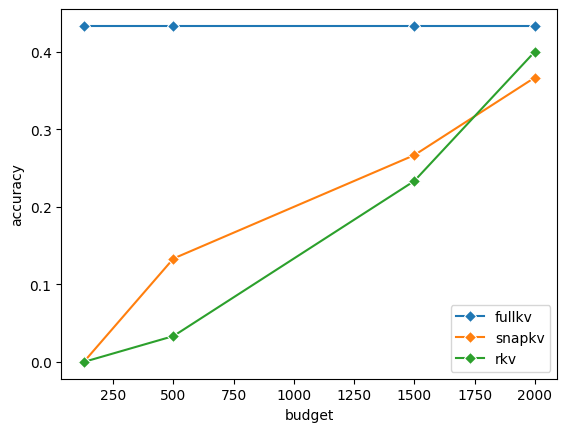

In [6]:
# Plot for FULL KV 
full_kv_acc = accuracy(pd.read_json("results/output_fullkv.jsonl", lines=True))
data = pd.DataFrame({'budget': kv_budget, 'accuracy': [full_kv_acc] * len(kv_budget)})
sns.lineplot(data=data, x='budget', y='accuracy', markers=True, marker='D', label="fullkv")


for method in methods:
    acc_lst = []
    for budget in kv_budget:
        df = pd.read_json(f"results/output_{method}_{budget}.jsonl", lines=True)
        acc_lst.append(accuracy(df))
    data = pd.DataFrame({'budget': kv_budget, 'accuracy': acc_lst})
    sns.lineplot(data=data, x='budget', y='accuracy', markers=True, marker='D', label=method)
    
    


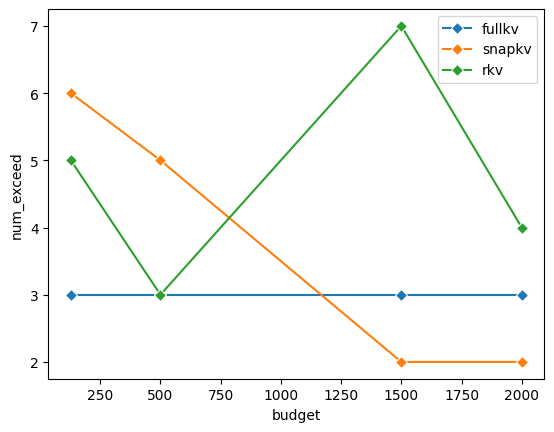

In [7]:
# Plot for FULL KV 
full_kv_acc = exceed_reasoning(pd.read_json("results/output_fullkv.jsonl", lines=True))
data = pd.DataFrame({'budget': kv_budget, 'num_exceed': [full_kv_acc] * len(kv_budget)})
sns.lineplot(data=data, x='budget', y='num_exceed', markers=True, marker='D', label="fullkv")

for method in methods:
    acc_lst = []
    for budget in kv_budget:
        df = pd.read_json(f"results/output_{method}_{budget}.jsonl", lines=True)
        acc_lst.append(exceed_reasoning(df))
    data = pd.DataFrame({'budget': kv_budget, 'num_exceed': acc_lst})
    sns.lineplot(data=data, x='budget', y='num_exceed', markers=True, marker='D', label=method)

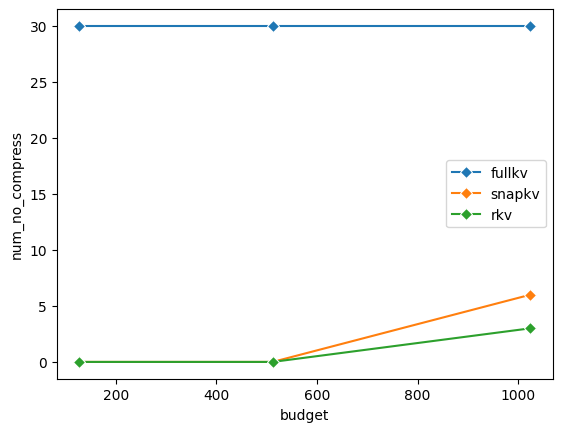

In [11]:
# Plot for FULL KV 
full_kv_acc = num_no_compress(pd.read_json("results/output_fullkv.jsonl", lines=True), 100000)
data = pd.DataFrame({'budget': kv_budget, 'num_no_compress': [full_kv_acc] * len(kv_budget)})
sns.lineplot(data=data, x='budget', y='num_no_compress', markers=True, marker='D', label="fullkv")


for method in methods:
    acc_lst = []
    for budget in kv_budget:
        df = pd.read_json(f"results/output_{method}_{budget}.jsonl", lines=True)
        acc_lst.append(num_no_compress(df, budget))
    data = pd.DataFrame({'budget': kv_budget, 'num_no_compress': acc_lst})
    sns.lineplot(data=data, x='budget', y='num_no_compress', markers=True, marker='D', label=method)
    
    


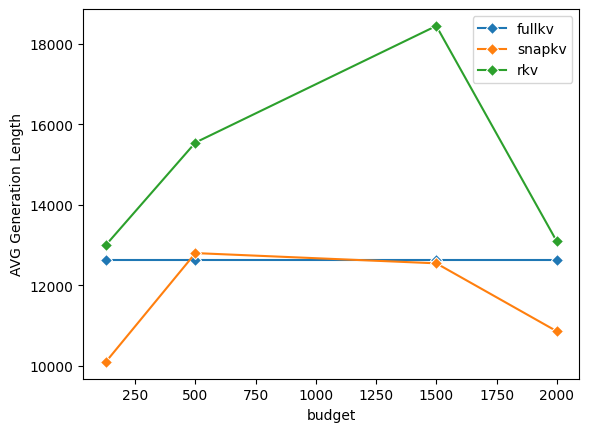

In [8]:
# Plot for FULL KV 
full_kv_acc = average_generation_length(pd.read_json("results/output_fullkv.jsonl", lines=True))
data = pd.DataFrame({'budget': kv_budget, 'AVG Generation Length': [full_kv_acc] * len(kv_budget)})
sns.lineplot(data=data, x='budget', y='AVG Generation Length', markers=True, marker='D', label="fullkv")


for method in methods:
    acc_lst = []
    for budget in kv_budget:
        df = pd.read_json(f"results/output_{method}_{budget}.jsonl", lines=True)
        acc_lst.append(average_generation_length(df))
    data = pd.DataFrame({'budget': kv_budget, 'AVG Generation Length': acc_lst})
    sns.lineplot(data=data, x='budget', y='AVG Generation Length', markers=True, marker='D', label=method)
    
    
